<a href="https://colab.research.google.com/github/talaricoferreira/mestrado/blob/main/testes_Baysiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Testes com Algoritimo de Baysiana tirada do Artigo de Holmes ans Held (2006)
[Implementação em R do Artigo](https://rstudio-pubs-static.s3.amazonaws.com/208180_b659633007eb45aa9c48e4c50b8afc07.html)



---



##Importando Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
random.seed(42) # define the seed (important to reproduce the results)
from sklearn import datasets
from sklearn.decomposition import PCA
import pymc as pm
import tensorflow as tf
import tensorflow_probability as tfp
from scipy.stats import truncnorm
import statsmodels.api as smf
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, multivariate_normal
import scipy.stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler



##Usando o Dataset Iris como Teste
Por ser uma base de dados conhecida é mais facil usa-la para testar o algoritimo, aqui já fazendo o *split* da base

In [ ]:
iris = datasets.load_iris()
y = iris.target_names[iris.target] #caso queira se usar as variaveis categoricas
y_target=iris.target #caso se queira usar as variaveis como inteiros
X = iris.data
p = 0.3 # fracao de elementos no conjunto de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

In [ ]:
print(iris.target)
print(iris.target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)


##Função que faz o *fit* da base

In [ ]:
def probit(y,X,target):
    """
    Performs Probity model for Any Classes

    Args:
      X: A array  contaiining the features.
      y: A NumPy array of shape (n, 1) containing the labels.
      target: Thr label that  want probit distribuition.


    Returns:
      Probit distribuition for target
    """
    yresult= np.where(y==target,1,0)
    #print(yresult)
    #calcular probit da amostra
    probit_model=smf.Probit(yresult,X)
    result=probit_model.fit()
    return result

##Testando a função Probit

In [ ]:
#print(y_train)
#x_coluna = X_train['test1','teste2']
rescaled = preprocessing.normalize(X_train)
scaler = StandardScaler().fit(rescaled)
rescaledX = scaler.transform(rescaled)
print(rescaledX)
X_pd = teste = pd.DataFrame(rescaledX,columns=iris.feature_names,)
print(X_train.shape)
print(y_train.shape)
resultado = probit(y_train,X_pd, 'versicolor')
teste = pd.DataFrame(resultado.params,columns=['coef'],)
#parametros= pd.DataFrame(resultado.params)
#mtriz = np.dot(X_pd,teste['coef'])
mtriz= X_pd@teste['coef']
mtriz1 = pd.DataFrame(mtriz)
#mtriz=teste['coef']@X_pd.T
mtriz_sorted = pd.DataFrame(mtriz, columns=['result'])
mtriz_sorted = mtriz_sorted.sort_values('result')
print(mtriz)

#print(mtriz.sort_values(mtriz.sort_values('coef')))


[[ 0.81001126  2.13536667 -1.76288127 -1.49356986]
 [-0.60923427 -0.73576036  0.63948842  0.89569382]
 [-2.03696299 -0.44772347  0.93863556  1.4277654 ]
 [ 1.37889511  1.82319729 -1.86575543 -1.72614686]
 [-0.30177018 -0.39333544  0.52038983  0.14288176]
 [ 0.31532312 -0.62326472  0.33437359  0.24421505]
 [-0.36857746 -0.59999656  0.52327842  0.75325797]
 [ 0.5145978  -0.35805428  0.18320021 -0.05774267]
 [-1.08923214 -0.38767243  0.61297215  1.29631095]
 [ 0.74644575  2.16356361 -1.71778967 -1.77918917]
 [-0.45201139 -0.63710974  0.54592324  0.88045329]
 [-0.11185829 -0.07945461  0.26201768  0.42595886]
 [-0.62372478 -0.57789512  0.5915175   0.88156345]
 [ 0.95808378 -0.26756733 -0.04078739 -0.27326054]
 [-0.44186784 -0.07555044  0.38272865  0.52601098]
 [-0.261404   -0.251425    0.44585488  0.14863446]
 [ 2.63299522  0.62843506 -1.68371809 -1.40227106]
 [ 0.42455281 -0.52762906  0.30104174 -0.10130642]
 [-0.46963462 -0.45379192  0.62983888  0.0042169 ]
 [ 1.2218588   1.92295813 -1.84

## Imprimindo o Gráfico
Deu ruim, não saiu um grafico decente

In [ ]:
X_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.810011,2.135367,-1.762881,-1.493570
1,-0.609234,-0.735760,0.639488,0.895694
2,-2.036963,-0.447723,0.938636,1.427765
3,1.378895,1.823197,-1.865755,-1.726147
4,-0.301770,-0.393335,0.520390,0.142882


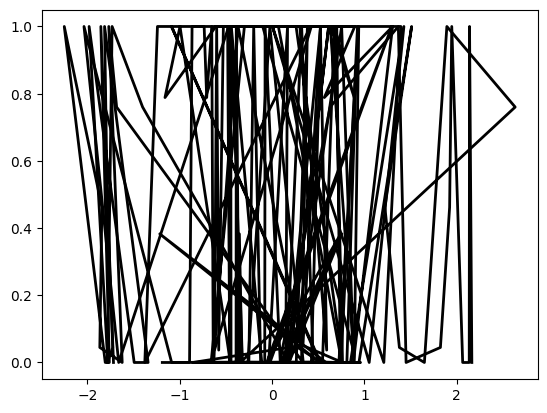

In [ ]:
fig, ax = plt.subplots(1, 1)

#ax.plot(X_pd, norm.cdf(np.dot(X_pd,teste['coef'])),'k-', lw=2)
ax.plot( X_pd.sort_values(by="sepal width (cm)"), norm.cdf(mtriz),'k-', lw=2)
plt.show()

##Implementação do modelo aumentado
Grafico continua ruim

[0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1
 0 0 0 1 0 0 1 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


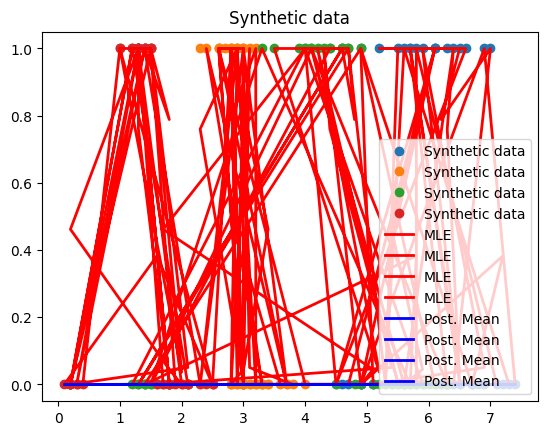

In [85]:
# Required libraries
#import numpy as np
#from scipy.stats import truncnorm, multivariate_normal
#import matplotlib.pyplot as plt

#trecho para inicializare as váriaveis
X = X_train
x=X
y= np.where(y_train=='versicolor',1,0)
print(y)
#fim do trecho

# Conjugate prior on the coefficients theta ~ N(theta_0, Q_0)
theta_0 = np.zeros(X.shape[1])  # D = X.shape[1]
Q_0 = np.diag(np.repeat(10, X.shape[1]))

# Initialize parameters
theta = np.zeros(X.shape[1])
z = np.zeros(len(x))  # N = len(x)
print(z)
# Number of simulations for Gibbs sampler
N_sim = 10000
# Burn-in period
burn_in = 5000
# Matrix storing samples of the theta parameter
theta_chain = np.zeros((N_sim, X.shape[1]))

# ---------------------------------
# Gibbs sampling algorithm
# ---------------------------------

# Compute posterior variance of theta
prec_0 = np.linalg.inv(Q_0)
V = np.linalg.inv(prec_0 + X.T @ X)

for t in range(1, N_sim):
    # Update Mean of z
    mu_z = X @ theta
    N0 = np.sum(y == 0)

    N1 = np.sum(y == 1)

    # Draw latent variable z from its full conditional: z | theta, y, X
    z[y == 0] = truncnorm.rvs(-np.inf, 0, loc=mu_z[y == 0], scale=1, size=N0)
    z[y == 1] = truncnorm.rvs(0, np.inf, loc=mu_z[y == 1], scale=1, size=N1)

    # Compute posterior mean of theta
    M = V @ (prec_0 @ theta_0 + X.T @ z)
    # Draw variable theta from its full conditional: theta | z, X
    theta = multivariate_normal.rvs(M, V)

    # Store the theta draws
    theta_chain[t, :] = theta

# ---------------------------
# Get posterior mean of theta
# ---------------------------
post_theta = np.mean(theta_chain[burn_in:, :], axis=0)
# Compute MLE estimate of theta

# Plot covariates x versus observations y
plt.plot(x, y, 'o', label='Synthetic data')
# Show the fitted function using the posterior mean estimates
plt.plot(x, norm.cdf(mtriz), color='red', linewidth=2, label='MLE') #usa a matriz calculada anteriormente
plt.plot(x, norm.cdf(X @ post_theta), color='blue', linewidth=2, label='Post. Mean')
plt.title('Synthetic data')
plt.legend(loc='lower right')
plt.show()


In [86]:
#parametros
X=iris.data
y = iris.target_names[iris.target]
N_sim = 5000 #numero de simulações
burn_in = 1000 #burn in
D = X.shape[1] #features
y= np.where(y=='versicolor',1,0) #qual o target que se quer medir
#variaveis
N= len(X)
y_len = len(y)

#Matrix projeção coeficiente aleatoria
V= np.random.rand(X.shape[1], X.shape[1])
cov_X = np.cov(X.T)  # Estimate the covariance matrix of X
V = cov_X + 1e-12 * np.eye(D)  # Add a small positive constant to the diagonal elements
# Compute the martix S = VX'
S = np.dot(V, X.T)

# h stores the diagonal elements of the hat matrix (XS = XVX')
h,w,u = np.zeros((3,N))
for j in (range(0,N)):
    h[j]=X[j,:]@S[:,j]
    w[j] =h[j] / (1 - h[j])
    u[j] = w[j] + 1


# Initialize latent variable Z, from truncated normal
# Get the size of N0 and N1.


# Generate random numbers from a truncated normal distribution.
z = np.where(y == 0, truncnorm.rvs(-np.inf, 0, loc=0, scale=1, size=y_len),
              truncnorm.rvs(0, np.inf, loc=0, scale=1, size=y_len))

# Matrix storing samples of theta parameter
theta_chain_holmes = np.zeros((N_sim, X.shape[1]))

# ---------------------------------
# Gibbs sampling algorithm
# ---------------------------------

# Compute the conditional mean of \theta
M = S@z

for t in (range(1,N_sim+1)):

    for j in ((range(0,N))):
      # Store the old value of z
      z_old = z[j]
      # Update mean of latent variable z_i
      m = X[j,: ] @ M
      m = m - w[j] * (z[j] - m)

      # Draw latent variable z from full conditional: z_j | z_-j, y, X
      if y[j]==0:
        z[j] = truncnorm.rvs(-np.inf, 0, loc=m, scale=abs(u[j]), size=1)
      else:
        z[j] = truncnorm.rvs(0,np.inf, loc=m, scale=abs(u[j]), size=1)
      # Update the posterior mean M
      M = M + (z[j] - z_old) * S[:,j]
    # Posterior of M | Z

    if t >= burn_in:  # Check if t is within the valid range
        theta_chain_holmes[t - burn_in, :] = multivariate_normal.rvs(mean=M, cov=V, size=1)
# Get posterior mean of theta
post_theta_holmes = np.mean(theta_chain_holmes[burn_in:], axis=0)
print(post_theta_holmes)

[ 3.72524178e+102  3.33519063e+102 -5.75994525e+102 -1.43507668e+102]
